In [327]:
import pandas as pd
import numpy as np
from operator import itemgetter
import plotly.express as px
import plotly
import plotly.graph_objs as go
from scipy import stats
import os
if not os.path.exists("images"):
    os.mkdir("images")

In [328]:
#read data

covid_df = pd.read_csv("../../../data/output/covid.csv")
covid_df = covid_df.drop("Unnamed: 0",axis =1)
covid_df = covid_df.drop(covid_df.loc[covid_df['County Name'] == "Statewide Unallocated"].index)

In [329]:
#Groupby covid_df based on State

covid_dfState = covid_df.groupby("State").sum()
covid_dfState = covid_dfState.drop(["countyFIPS", "stateFIPS"],axis =1)
covid_dfState.reset_index(inplace=True)
covid_dfState.head()

,State,population,1/22/20_x,1/23/20_x,1/24/20_x,1/25/20_x,1/26/20_x,1/27/20_x,1/28/20_x,1/29/20_x,...,10/17/20_y,10/18/20_y,10/19/20_y,10/20/20_y,10/21/20_y,10/22/20_y,10/23/20_y,10/24/20_y,10/25/20_y,10/26/20_y
0,AK,731545,0,0,0,0,0,0,0,0,...,66,66,66,67,68,68,68,68,68,68
1,AL,4903185,0,0,0,0,0,0,0,0,...,2787,2787,2788,2804,2828,2843,2859,2866,2866,2866
2,AR,3017804,0,0,0,0,0,0,0,0,...,1683,1702,1712,1727,1750,1771,1782,1797,1812,1833
3,AZ,7278717,0,0,0,0,1,1,1,1,...,5822,5827,5830,5837,5854,5859,5865,5869,5874,5875
4,CA,39512223,0,0,0,0,2,3,3,4,...,16954,16990,17012,17049,17214,17287,17337,17344,17355,17400


# Task1

## Generate weekly statistics (mean, median, mode) for number of cases and deaths across a specific state. Compare the data against other states.

#### I selected MA to generate weekly statistics. Then, I chose AZ, IN, MO, NJ, TN to compare their data with MA data. The reason that I selected those 5 states is that their population is similar to MA.

In [330]:
# Select states AZ, IN, MO, NJ, TN

covid_dfSt = covid_dfState.iloc[ [3,15,19,24,31,42] , : ]
covid_dfSt

,State,population,1/22/20_x,1/23/20_x,1/24/20_x,1/25/20_x,1/26/20_x,1/27/20_x,1/28/20_x,1/29/20_x,...,10/17/20_y,10/18/20_y,10/19/20_y,10/20/20_y,10/21/20_y,10/22/20_y,10/23/20_y,10/24/20_y,10/25/20_y,10/26/20_y
3,AZ,7278717,0,0,0,0,1,1,1,1,...,5822,5827,5830,5837,5854,5859,5865,5869,5874,5875
15,IN,6732219,0,0,0,0,0,0,0,0,...,3918,3937,3960,4007,4022,4064,4092,4118,4130,4143
19,MA,6892503,0,0,0,0,0,0,0,0,...,9718,9732,9748,9753,9775,9805,9825,9834,9859,9876
24,MO,6137428,0,0,0,0,0,0,0,0,...,2493,2493,2493,2639,2655,2687,2800,2804,2809,2838
31,NJ,8882190,0,0,0,0,0,0,0,0,...,16204,16210,16214,16226,16245,16263,16273,16281,16285,16292
42,TN,6829174,0,0,0,0,0,0,0,0,...,2864,2870,2882,2910,2930,2969,3031,3055,3092,3122


In [331]:
#Seperate Cases and Deaths

StCases = covid_dfSt.filter(regex = "x")
StDeaths = covid_dfSt.filter(regex = "y")

In [332]:
# Calculate new Cases and deaths

StNewCases = StCases.diff(axis = 1)
StNewDeaths = StDeaths.diff(axis = 1)
StNewCases

,1/22/20_x,1/23/20_x,1/24/20_x,1/25/20_x,1/26/20_x,1/27/20_x,1/28/20_x,1/29/20_x,1/30/20_x,1/31/20_x,...,10/17/20_x,10/18/20_x,10/19/20_x,10/20/20_x,10/21/20_x,10/22/20_x,10/23/20_x,10/24/20_x,10/25/20_x,10/26/20_x
3,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,972.0,741.0,716.0,1074.0,975.0,994.0,975.0,890.0,1388.0,805.0
15,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2485.0,1605.0,1583.0,1500.0,1734.0,2856.0,2467.0,2741.0,2152.0,1971.0
19,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,567.0,744.0,827.0,808.0,636.0,986.0,977.0,1110.0,1117.0,1207.0
24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4396.0,1763.0,0.0,4179.0,1852.0,1813.0,2918.0,2043.0,1524.0,1698.0
31,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,946.0,1249.0,1189.0,969.0,1042.0,1138.0,1041.0,1829.0,1137.0,1215.0
42,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2528.0,2405.0,2951.0,1566.0,2272.0,1917.0,4513.0,2468.0,4064.0,2152.0


#### Normalizing new cases and new deaths per 1000000 people. Since population of each state is around 7000000, I selected 1000000 for normalizing my data.

In [333]:
# Normalize new cases

StNormCases = StNewCases.transpose()
StNormCases["AZ Cases(Norm)"] = ((StNormCases[3]/7278717)*1000000).round()
StNormCases["IN Cases(Norm)"] = ((StNormCases[15]/6732219)*1000000).round()
StNormCases["MA Cases(Norm)"] = ((StNormCases[19]/6892503)*1000000).round()
StNormCases["MO Cases(Norm)"] = ((StNormCases[24]/6137428)*1000000).round()
StNormCases["NJ Cases(Norm)"] = ((StNormCases[31]/8882190)*1000000).round()
StNormCases["TN Cases(Norm)"] = ((StNormCases[42]/6829174)*1000000).round()
StNormCases.drop(columns =[3,15,19,24,31,42], inplace = True)


# Normalize new deaths

StNormDeaths = StNewDeaths.transpose()
StNormDeaths["AZ Deaths(Norm)"] = ((StNormDeaths[3]/7278717)*1000000).round()
StNormDeaths["IN Deaths(Norm)"] = ((StNormDeaths[15]/6732219)*1000000).round()
StNormDeaths["MA Deaths(Norm)"] = ((StNormDeaths[19]/6892503)*1000000).round()
StNormDeaths["MO Deaths(Norm)"] = ((StNormDeaths[24]/6137428)*1000000).round()
StNormDeaths["NJ Deaths(Norm)"] = ((StNormDeaths[31]/8882190)*1000000).round()
StNormDeaths["TN Deaths(Norm)"] = ((StNormDeaths[42]/6829174)*1000000).round()
StNormDeaths.drop(columns =[3,15,19,24,31,42], inplace = True)

StNormCases

,AZ Cases(Norm),IN Cases(Norm),MA Cases(Norm),MO Cases(Norm),NJ Cases(Norm),TN Cases(Norm)
1/22/20_x,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20_x,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20_x,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20_x,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20_x,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
10/22/20_x,137.0,424.0,143.0,295.0,128.0,281.0
10/23/20_x,134.0,366.0,142.0,475.0,117.0,661.0
10/24/20_x,122.0,407.0,161.0,333.0,206.0,361.0
10/25/20_x,191.0,320.0,162.0,248.0,128.0,595.0


#### Calculate weekly mean for new cases and new deaths

In [334]:
#Calculate mean for Normalized New Cases

StNormCases_week = StNormCases.groupby(np.arange(len(StNormCases))//7).mean().round(0).astype(int).rename_axis('Week')
StNormCases_week.columns = ['AZ', 'IN','MA','MO','NJ','TN']
StNormCases_week = StNormCases_week.reset_index()
StNormCases_week

,Week,AZ,IN,MA,MO,NJ,TN
0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,2,0,0,0,0,0,0
3,3,0,0,0,0,0,0
4,4,0,0,0,0,0,0
5,5,0,0,0,0,0,0
6,6,0,0,2,0,0,0
7,7,0,0,3,0,4,1
8,8,6,7,18,5,45,10
9,9,19,38,108,25,193,25


In [335]:
#Calculate mean for Normalized New Deaths

StNormDeaths_week = StNormDeaths.groupby(np.arange(len(StNormDeaths))//7).mean().round(0).astype(int).rename_axis('Week')
StNormDeaths_week.columns = ['AZ', 'IN','MA','MO','NJ','TN']
StNormDeaths_week = StNormDeaths_week.reset_index()

#### Mean, Median and Mode for normalized new cases and new deaths. Value of mode for most of the states is zero. That's why, after calculating mode, I also write a code for ignoring zero and calculating mode.

In [336]:
# Calculate Mean, Median, Mode for Normalized Cases

AZNormCases_mean = round(StNormCases_week["AZ"].mean())
AZNormCases_median = round(StNormCases_week["AZ"].median())
AZNormCases_mode = StNormCases_week["AZ"].mode()
AZNormCases0_mode = StNormCases_week["AZ"].replace(0, np.nan).mode()

INNormCases_mean = round(StNormCases_week["IN"].mean())
INNormCases_median = round(StNormCases_week["IN"].median())
INNormCases_mode = StNormCases_week["IN"].mode()
INNormCases0_mode = StNormCases_week["IN"].replace(0, np.nan).mode()

MANormCases_mean = round(StNormCases_week["MA"].mean())
MANormCases_median = round(StNormCases_week["MA"].median())
MANormCases_mode = StNormCases_week["MA"].mode()
MANormCases0_mode = StNormCases_week["MA"].replace(0, np.nan).mode()

MONormCases_mean = round(StNormCases_week["MO"].mean())
MONormCases_median = round(StNormCases_week["MO"].median())
MONormCases_mode = StNormCases_week["MO"].mode()
MONormCases0_mode = StNormCases_week["MO"].replace(0, np.nan).mode()

NJNormCases_mean = round(StNormCases_week["NJ"].mean())
NJNormCases_median = round(StNormCases_week["NJ"].median())
NJNormCases_mode = StNormCases_week["NJ"].mode()
NJNormCases0_mode = StNormCases_week["NJ"].replace(0, np.nan).mode()

TNNormCases_mean = round(StNormCases_week["TN"].mean())
TNNormCases_median = round(StNormCases_week["TN"].median())
TNNormCases_mode = StNormCases_week["TN"].mode()
TNNormCases0_mode = StNormCases_week["TN"].replace(0, np.nan).mode()

In [337]:
# Create a list of lists for cases mean, median, mode

Cases_statistics =[[AZNormCases_mean, INNormCases_mean, MANormCases_mean, MONormCases_mean, NJNormCases_mean,TNNormCases_mean],
             [AZNormCases_median, INNormCases_median, MANormCases_median, MONormCases_median, NJNormCases_median, TNNormCases_median],
             [AZNormCases_mode[0], INNormCases_mode[0], MANormCases_mode[0], MONormCases_mode[0], NJNormCases_mode[0], TNNormCases_mode[0]]]


#Create a dataframe from list

Cases_sta = pd.DataFrame(Cases_statistics, columns = ['AZ', 'IN', 'MA','MO', 'NJ', 'TN'], 
                         index=['Mean', 'Median', 'Mode'])  
Cases_sta

,AZ,IN,MA,MO,NJ,TN
Mean,118,90,82,102,93,129
Median,64,76,50,39,46,80
Mode,0,0,0,0,0,0


##### In all states mean is larger than median and mode is zero which means the distribution is right skewed.  Larger value of mean shows that there are a few larger value of new cases in the data which drives the mean upward, but they could not effect the median. The difference between mean and median in IN is not very big which shows that the distribution of new cases data can be assumed to be approximately symmetrical compare to other states. TN has the highest mean and MA lowest mean among other states. Since the data is normalized, we can conclude that MA has the lowest new cases and TN has the highest new Cases among other states.

In [338]:
# Calculate Mean, Median, Mode for normalized new Deaths

AZNormDeaths_mean = round(StNormDeaths_week["AZ"].mean())
AZNormDeaths_median = round(StNormDeaths_week["AZ"].median())
AZNormDeaths_mode = StNormDeaths_week["AZ"].mode()
AZNormDeaths0_mode = StNormDeaths_week["AZ"].replace(0, np.nan).mode()

INNormDeaths_mean = round(StNormDeaths_week["IN"].mean())
INNormDeaths_median = round(StNormDeaths_week["IN"].median())
INNormDeaths_mode = StNormDeaths_week["IN"].mode()
INNormDeaths0_mode = StNormDeaths_week["IN"].replace(0, np.nan).mode()

MANormDeaths_mean = round(StNormDeaths_week["MA"].mean())
MANormDeaths_median = round(StNormDeaths_week["MA"].median())
MANormDeaths_mode = StNormDeaths_week["MA"].mode()
MANormDeaths0_mode = StNormDeaths_week["MA"].replace(0, np.nan).mode()

MONormDeaths_mean = round(StNormDeaths_week["MO"].mean())
MONormDeaths_median = round(StNormDeaths_week["MO"].median())
MONormDeaths_mode = StNormDeaths_week["MO"].mode()
MONormDeaths0_mode = StNormDeaths_week["MO"].replace(0, np.nan).mode()

NJNormDeaths_mean = round(StNormDeaths_week["NJ"].mean())
NJNormDeaths_median = round(StNormDeaths_week["NJ"].median())
NJNormDeaths_mode = StNormDeaths_week["NJ"].mode()
NJNormDeaths0_mode = StNormDeaths_week["NJ"].replace(0, np.nan).mode()


TNNormDeaths_mean = round(StNormDeaths_week["TN"].mean())
TNNormDeaths_median = round(StNormDeaths_week["TN"].median())
TNNormDeaths_mode = StNormDeaths_week["TN"].mode()
TNNormDeaths0_mode = StNormDeaths_week["TN"].replace(0, np.nan).mode()

# TNNormDeaths_mean = round(StNormDeaths_week["TN"].mean())
# TNNormDeaths_median = round(StNormDeaths_week["TN"].median())
# TNNormDeaths_mode = StNormDeaths_week["TN"].mode()
# TNNormDeaths0_mode = StNormDeaths_week["TN"].replace(0, np.nan).mode()

In [339]:

Cases_statistics =[[AZNormDeaths_mean, INNormDeaths_mean, MANormDeaths_mean, MONormDeaths_mean, NJNormDeaths_mean, TNNormDeaths_mean],
             [AZNormDeaths_median,INNormDeaths_median, MANormDeaths_median, MONormDeaths_median, NJNormDeaths_median, TNNormDeaths_median],
             [AZNormDeaths_mode[0],INNormDeaths_mode[0],MANormDeaths_mode[0],MONormDeaths_mode[0],NJNormDeaths_mode[0],TNNormDeaths_mode[0]]]


#Create a dataframe from list

Cases_sta = pd.DataFrame(Cases_statistics, columns = ['AZ', 'IN', 'MA','MO', 'NJ', 'TN'], 
                         index=['Mean', 'Median', 'Mode'])  
Cases_sta

,AZ,IN,MA,MO,NJ,TN
Mean,3,2,5,2,7,2
Median,2,2,2,1,1,1
Mode,0,2,2,1,1,1


##### NJ has the highest mean of new deaths and the difference between its median and its mean is remarkable compare to other states which shows the peak is close to the left side of the graph. IN, TN and MO have the lowest Mean but the mean, median and mode of IN are equal which demonestrate that  the distribution of new cases in IN as approximately symmetrical. For some period of time mode = 0 indicates that the state was successful to minimize the number of deathes for a greater number of weeks, however it was temporery.

## Identify counties within the previous state with high case and death rates.

In [340]:
#select counties for MA

MACounties = covid_df.loc[covid_df['State'] == "MA"]
MACounties.head()

,countyFIPS,County Name,State,population,stateFIPS,1/22/20_x,1/23/20_x,1/24/20_x,1/25/20_x,1/26/20_x,...,10/17/20_y,10/18/20_y,10/19/20_y,10/20/20_y,10/21/20_y,10/22/20_y,10/23/20_y,10/24/20_y,10/25/20_y,10/26/20_y
1240,25001,Barnstable County,MA,212990,25,0,0,0,0,0,...,181,181,181,181,181,182,182,182,182,182
1241,25003,Berkshire County,MA,124944,25,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
1242,25005,Bristol County,MA,565217,25,0,0,0,0,0,...,731,731,732,732,733,735,735,737,741,743
1243,25007,Dukes County,MA,17332,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1244,25009,Essex County,MA,789034,25,0,0,0,0,0,...,1322,1326,1330,1330,1331,1333,1336,1337,1340,1341


In [341]:
#add a new column to MA dataset which shows total confirmed cases for each county
MACounties['Total Cases']= MACounties["10/19/20_x"]

#add a new column to MA dataset which shows total death for each county
MACounties['Total Death']= MACounties["10/19/20_y"]
MACounties.head()

C:\Users\sanam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sanam\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,countyFIPS,County Name,State,population,stateFIPS,1/22/20_x,1/23/20_x,1/24/20_x,1/25/20_x,1/26/20_x,...,10/19/20_y,10/20/20_y,10/21/20_y,10/22/20_y,10/23/20_y,10/24/20_y,10/25/20_y,10/26/20_y,Total Cases,Total Death
1240,25001,Barnstable County,MA,212990,25,0,0,0,0,0,...,181,181,181,182,182,182,182,182,2123,181
1241,25003,Berkshire County,MA,124944,25,0,0,0,0,0,...,51,51,51,51,51,51,51,51,783,51
1242,25005,Bristol County,MA,565217,25,0,0,0,0,0,...,732,732,733,735,735,737,741,743,11639,732
1243,25007,Dukes County,MA,17332,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,87,0
1244,25009,Essex County,MA,789034,25,0,0,0,0,0,...,1330,1330,1331,1333,1336,1337,1340,1341,22899,1330


In [342]:
# Highest rate of cases in MA counties

highest_rateCases_MA = MACounties[['County Name', "population", "Total Cases"]] 
highest_rateCases_MA["Rate of Cases"] = ((highest_rateCases_MA["Total Cases"]/highest_rateCases_MA["population"])*100000).round()
highest_rateCases_MA = highest_rateCases_MA.sort_values(['Rate of Cases'], ascending = False) 
highest_rateCases_MA.head()

C:\Users\sanam\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,County Name,population,Total Cases,Rate of Cases
1252,Suffolk County,803907,27634,3437.0
1244,Essex County,789034,22899,2902.0
1253,Worcester County,830622,18105,2180.0
1251,Plymouth County,521202,11194,2148.0
1242,Bristol County,565217,11639,2059.0


In [343]:
# Highest rate of death in MA counties without normalizing

highest_rateDeath_MA = MACounties[['County Name', "population", "Total Death"]] 
highest_rateDeath_MA["Rate of Death"] = ((highest_rateDeath_MA["Total Death"]/highest_rateDeath_MA["population"])*100000).round()
highest_rateDeath_MA = highest_rateDeath_MA.sort_values(['Rate of Death'], ascending = False) 
highest_rateDeath_MA.head()

C:\Users\sanam\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,County Name,population,Total Death,Rate of Death
1246,Hampden County,466372,799,171.0
1244,Essex County,789034,1330,169.0
1250,Norfolk County,706775,1093,155.0
1251,Plymouth County,521202,804,154.0
1252,Suffolk County,803907,1160,144.0


## Plot daily trends (cases and deaths, new cases) of state and top 5 infected counties. Utilize aggregrate, normalized by population, and log normalized values.

### New Cases

In [344]:
stateMAST= covid_dfSt.transpose()
MA = stateMAST[19]
MA_NewCases = MA.filter(regex = "x").to_frame()
MA_NewDeaths = MA.filter(regex = "y").to_frame()

In [345]:
#Select counties with highest rate of cases 
MACounties_caseRate = MACounties.loc[(MACounties['County Name']=="Suffolk County") | (MACounties['County Name']=="Essex County")
                             | (MACounties['County Name']=="Plymouth County")| (MACounties['County Name']=="Bristol County")
                             | (MACounties['County Name']=="Middlesex County")]
MACounties_caseRate.drop(columns = "County Name_y", inplace=True)

In [346]:
#Select number of Cases
CountiesCases = MACounties_caseRate.filter(regex = "x")
CountiesCases = CountiesCases.transpose()

#Rename columns
CountiesCases.columns = ['Bristol County', 'Essex County','Middlesex County','Plymouth County'
                         ,'Suffolk County']
CountiesCases.head()

,Bristol County,Essex County,Middlesex County,Plymouth County,Suffolk County
1/22/20_x,0,0,0,0,0
1/23/20_x,0,0,0,0,0
1/24/20_x,0,0,0,0,0
1/25/20_x,0,0,0,0,0
1/26/20_x,0,0,0,0,0


In [347]:
# Calculate new Cases for highest rated counties

CountiesNewCases = CountiesCases.diff()
MA_NewCases = MA_NewCases.diff()

In [348]:
#Concatenate two MA dataframe with counties dataframe

dailyTrendsCases = pd.concat([MA_NewCases, CountiesNewCases], axis=1)
dailyTrendsCases.head()

,19,Bristol County,Essex County,Middlesex County,Plymouth County,Suffolk County
1/22/20_x,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20_x,0,0.0,0.0,0.0,0.0,0.0
1/24/20_x,0,0.0,0.0,0.0,0.0,0.0
1/25/20_x,0,0.0,0.0,0.0,0.0,0.0
1/26/20_x,0,0.0,0.0,0.0,0.0,0.0


#### Normalizing Data

In [349]:
# Normalize new cases

dailyTrendsCases["MA Cases(Norm)"] = (((dailyTrendsCases[19]/6892503)*300000).astype(float)).round()
dailyTrendsCases["Bristol Cases(Norm)"] = ((dailyTrendsCases["Bristol County"]/565217)*300000).round()
dailyTrendsCases["Essex Cases(Norm)"] = ((dailyTrendsCases["Essex County"]/789034)*300000).round()
dailyTrendsCases["Middlesex Cases(Norm)"] = ((dailyTrendsCases["Middlesex County"]/1611699)*300000).round()
dailyTrendsCases["Plymouth Cases(Norm)"] = ((dailyTrendsCases["Plymouth County"]/521202)*300000).round()
dailyTrendsCases["Suffolk Cases(Norm)"] = ((dailyTrendsCases["Suffolk County"]/803907)*300000).round()


#Drop unnecessary columns 
dailyTrendsCases.drop(columns =[19,"Bristol County", "Essex County", "Middlesex County", "Plymouth County",
                               "Suffolk County"], inplace = True)
# dailyTrendsCases

#### Plot Daily Trends ( New Cases)

In [354]:
#Plotting Daily trends 

# pic1 = go.Figure()

trace0 = go.Scatter(x=dailyTrendsCases.index, y=dailyTrendsCases["MA Cases(Norm)"], 
                    name="MA", 
                    mode="lines+markers") 

trace1 = go.Scatter(x=dailyTrendsCases.index, y=dailyTrendsCases["Bristol Cases(Norm)"], 
                    name="Bristol", 
                    mode="lines+markers")  

trace2 = go.Scatter(x=dailyTrendsCases.index, y=dailyTrendsCases["Essex Cases(Norm)"], 
                    name="Essex", 
                    mode="lines+markers") 

trace3 = go.Scatter(x=dailyTrendsCases.index, y=dailyTrendsCases["Middlesex Cases(Norm)"], 
                    name="Middlesex", 
                    mode="lines+markers") 

trace4 = go.Scatter(x=dailyTrendsCases.index, y=dailyTrendsCases["Plymouth Cases(Norm)"], 
                    name="Plymouth", 
                    mode="lines+markers") 

trace5 = go.Scatter(x=dailyTrendsCases.index, y=dailyTrendsCases["Suffolk Cases(Norm)"], 
                    name="Suffolk", 
                    mode="lines+markers") 


mydata = go.Data([trace0, trace1,trace2, trace3,trace4,trace5])

mylayout = go.Layout(
    title=""
)

fig1 = go.Figure(data=mydata, layout=mylayout)

plotly.offline.iplot(fig, filename = '')


# fig1 = go.Figure(data=mydata, layout=mylayout)
fig1.write_image("Graphs/State.NewCases.DailyTrends.png")

ValueError: 
The orca executable is required to export figures as static images,
but it could not be found on the system path.

Searched for executable 'orca' on the following path:
    C:\Users\sanam\Anaconda3
    C:\Users\sanam\Anaconda3\Library\mingw-w64\bin
    C:\Users\sanam\Anaconda3\Library\usr\bin
    C:\Users\sanam\Anaconda3\Library\bin
    C:\Users\sanam\Anaconda3\Scripts
    C:\Program Files (x86)\Common Files\Oracle\Java\javapath
    C:\Program Files\Microsoft MPI\Bin\
    C:\WINDOWS\system32
    C:\WINDOWS
    C:\WINDOWS\System32\Wbem
    C:\WINDOWS\System32\WindowsPowerShell\v1.0\
    C:\WINDOWS\System32\OpenSSH\
    C:\Program Files\Java\jdk-14.0.2\bin
    C:\Program Files (x86)\Microsoft SQL Server\150\Tools\Binn\
    C:\Program Files\Microsoft SQL Server\150\Tools\Binn\
    C:\Program Files (x86)\Microsoft SQL Server\150\DTS\Binn\
    C:\Program Files\Microsoft SQL Server\150\DTS\Binn\
    C:\Program Files\Microsoft SQL Server\Client SDK\ODBC\170\Tools\Binn\
    C:\Program Files\Git\cmd
    C:\Program Files\Git\mingw64\bin
    C:\Program Files\Git\usr\bin
    C:\Users\sanam\Anaconda3
    C:\Users\sanam\Anaconda3\Library\mingw-w64\bin
    C:\Users\sanam\Anaconda3\Library\usr\bin
    C:\Users\sanam\Anaconda3\Library\bin
    C:\Users\sanam\Anaconda3\Scripts
    C:\Users\sanam\AppData\Local\Microsoft\WindowsApps
    
    C:\Users\sanam\Anaconda3\lib\site-packages\scipy\extra-dll

If you haven't installed orca yet, you can do so using conda as follows:

    $ conda install -c plotly plotly-orca

Alternatively, see other installation methods in the orca project README at
https://github.com/plotly/orca

After installation is complete, no further configuration should be needed.

If you have installed orca, then for some reason plotly.py was unable to
locate it. In this case, set the `plotly.io.orca.config.executable`
property to the full path of your orca executable. For example:

    >>> plotly.io.orca.config.executable = '/path/to/orca'

After updating this executable property, try the export operation again.
If it is successful then you may want to save this configuration so that it
will be applied automatically in future sessions. You can do this as follows:

    >>> plotly.io.orca.config.save()

If you're still having trouble, feel free to ask for help on the forums at
https://community.plot.ly/c/api/python


#### New Deaths

In [283]:
#Select counties with highest rate of cases 
MACounties_deathsRate = MACounties.loc[(MACounties['County Name']=="Essex County") | (MACounties['County Name']=="Hampden County")
                             | (MACounties['County Name']=="Norfolk County")| (MACounties['County Name']=="Plymouth County")
                             | (MACounties['County Name']=="Suffolk County")]
MACounties_deathsRate.drop(columns = "County Name_y", inplace=True)

In [284]:
#Select number of Deaths
CountiesDeaths = MACounties_deathsRate.filter(regex = "_y")
CountiesDeaths = CountiesDeaths.transpose()

#Rename columns
CountiesDeaths.columns = ['Essex County', 'Hampden County','Norfolk County','Plymouth County'
                         ,'Suffolk County']

In [285]:
# Calculate new Deaths for highest rated counties

CountiesNewDeaths = CountiesDeaths.diff()
MA_NewDeaths = MA_NewDeaths.diff()

In [286]:
#Concatenate two MA dataframe with counties dataframe

dailyTrendsDeaths = pd.concat([MA_NewDeaths, CountiesNewDeaths], axis=1)
dailyTrendsDeaths.head()

,19,Essex County,Hampden County,Norfolk County,Plymouth County,Suffolk County
1/22/20_y,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20_y,0,0.0,0.0,0.0,0.0,0.0
1/24/20_y,0,0.0,0.0,0.0,0.0,0.0
1/25/20_y,0,0.0,0.0,0.0,0.0,0.0
1/26/20_y,0,0.0,0.0,0.0,0.0,0.0


#### Normalizing Data

In [287]:
# Normalize new deaths

dailyTrendsDeaths["MA Deaths(Norm)"] = (((dailyTrendsDeaths[19]/6892503)*300000).astype(float)).round()
dailyTrendsDeaths["Essex Cases(Norm)"] = ((dailyTrendsDeaths["Essex County"]/789034)*300000).round()
dailyTrendsDeaths["Hampden Cases(Norm)"] = ((dailyTrendsDeaths["Hampden County"]/466372)*300000).round()
dailyTrendsDeaths["Norfolk Cases(Norm)"] = ((dailyTrendsDeaths["Norfolk County"]/706775)*300000).round()
dailyTrendsDeaths["Plymouth Cases(Norm)"] = ((dailyTrendsDeaths["Plymouth County"]/521202)*300000).round()
dailyTrendsDeaths["Suffolk Cases(Norm)"] = ((dailyTrendsDeaths["Suffolk County"]/803907)*300000).round()

#Drop unnecessary columns 
dailyTrendsDeaths.drop(columns =[19, "Essex County", "Hampden County", "Norfolk County", "Plymouth County",
                               "Suffolk County"], inplace = True)
dailyTrendsDeaths.head()

,MA Deaths(Norm),Essex Cases(Norm),Hampden Cases(Norm),Norfolk Cases(Norm),Plymouth Cases(Norm),Suffolk Cases(Norm)
1/22/20_y,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20_y,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20_y,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20_y,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20_y,0.0,0.0,0.0,0.0,0.0,0.0


#### Plot Daily Trends (New Deaths)

In [288]:
#Plotting Daily trends 

trace0 = go.Scatter(x=dailyTrendsDeaths.index, y=dailyTrendsDeaths["MA Deaths(Norm)"], 
                    name="MA", 
                    mode="lines+markers") 

trace1 = go.Scatter(x=dailyTrendsDeaths.index, y=dailyTrendsDeaths["Essex Cases(Norm)"], 
                    name="Essex", 
                    mode="lines+markers")  

trace2 = go.Scatter(x=dailyTrendsDeaths.index, y=dailyTrendsDeaths["Hampden Cases(Norm)"], 
                    name="Hampden", 
                    mode="lines+markers") 

trace3 = go.Scatter(x=dailyTrendsDeaths.index, y=dailyTrendsDeaths["Norfolk Cases(Norm)"], 
                    name="Norfolk", 
                    mode="lines+markers") 

trace4 = go.Scatter(x=dailyTrendsDeaths.index, y=dailyTrendsDeaths["Plymouth Cases(Norm)"], 
                    name="Plymouth", 
                    mode="lines+markers") 

trace5 = go.Scatter(x=dailyTrendsDeaths.index, y=dailyTrendsDeaths["Suffolk Cases(Norm)"], 
                    name="Suffolk", 
                    mode="lines+markers") 


mydata = go.Data([trace0, trace1,trace2, trace3,trace4,trace5])

mylayout = go.Layout(
    title=""
)

fig = go.Figure(data=mydata, layout=mylayout)

plotly.offline.iplot(fig, filename = '')

# Task 2

## Fit a distribution to the number of COVID-19 cases of a state.

In [289]:
from decimal import *
from IPython.display import display
from plotly.graph_objs import Bar, Scatter, Marker, Layout 
from plotly.offline import iplot
import numpy as np
from scipy.misc import factorial
%matplotlib inline
from matplotlib import pyplot as plt

##### First of all we should draw the histogram of our data

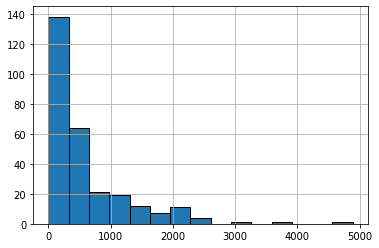

In [290]:
# Histogram of the MA Cases

STstate = StNewCases.transpose()
MA = STstate[19].fillna(0)
MA.diff()
MA.hist(bins = 15, ec = "black")

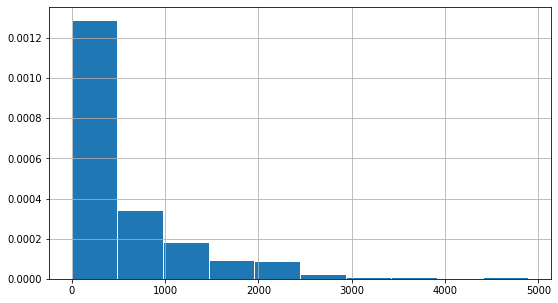

In [291]:
#Histogram of probability

MA.hist(density = True, ec='white', figsize=(9,5))

##### Histogram of the data shows that the data is right skewd. Also, we know data is discrete, then the poisson distribution can fit our data.

(0, 0.02)

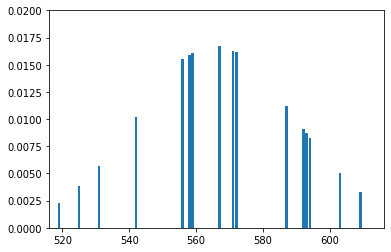

In [292]:
#Calculate pmf
pmf = stats.poisson.pmf(k=MA, mu=MA.mean()).round(4)

plt.bar(MA, pmf)

plt.xlim(MA.mean()-50,MA.mean()+50)
plt.ylim(0, 0.02)

In [293]:
MA.describe()

count     279.000000
mean      566.082437
std       692.096365
min         0.000000
25%        82.000000
50%       331.000000
75%       743.000000
max      4892.000000
Name: 19, dtype: float64

## Model a poission distribution of COVID-19 cases and deaths of a state and compare to other 5 states.

#### Normalizing Data by per 1000000 people

In [294]:
# StNormCases_week
# StNormDeaths_week

In [295]:
#Calculate mean of cases for each state 

STCasesMean = StNormCases_week.mean().round().astype(int)
STCasesMean

Week     20
AZ      118
IN       90
MA       82
MO      102
NJ       93
TN      129
dtype: int32

In [296]:
#Calculate mean of deaths for each state 

STDeathsMean = StNormDeaths_week.mean().round()
STDeathsMean

Week    20.0
AZ       3.0
IN       2.0
MA       5.0
MO       2.0
NJ       7.0
TN       2.0
dtype: float64

In [297]:
#calculate different K for different states for cases

K = [50,60,70,80,90,100,120,130]
AZ = []
IN = []
MA = []
MO = []
NJ = []
TN = []

# append calculated k to each corresponding list
for num in K:
    PMF = stats.poisson.pmf(k=num, mu=STCasesMean["AZ"]).round(4)
    AZ.append(PMF)
    
for num in K:
    PMF = stats.poisson.pmf(k=num, mu=STCasesMean["IN"]).round(4)
    IN.append(PMF)

for num in K:
    PMF = stats.poisson.pmf(k=num, mu=STCasesMean["MA"]).round(4)
    MA.append(PMF)
    
for num in K:
    PMF = stats.poisson.pmf(k=num, mu=STCasesMean["MO"]).round(4)
    MO.append(PMF)

for num in K:
    PMF = stats.poisson.pmf(k=num, mu=STCasesMean["NJ"]).round(4)
    NJ.append(PMF)
    
for num in K:
    PMF = stats.poisson.pmf(k=num, mu=STCasesMean["TN"]).round(4)
    TN.append(PMF)
    
#create a dataframe from lists
dfCases = pd.DataFrame(list(zip(K, AZ, IN, MA, MO, NJ, TN)), columns =['k','AZ', 'IN', 'MA', 'MO', 'NJ', 'TN'])
dfCases

,k,AZ,IN,MA,MO,NJ,TN
0,50,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,60,0.0000,0.0002,0.0020,0.0000,0.0001,0.0000
2,70,0.0000,0.0043,0.0189,0.0002,0.0021,0.0000
3,80,0.0000,0.0250,0.0435,0.0034,0.0172,0.0000
4,90,0.0011,0.0420,0.0288,0.0201,0.0400,0.0001
5,100,0.0094,0.0233,0.0063,0.0391,0.0308,0.0012
6,120,0.0358,0.0004,0.0000,0.0081,0.0010,0.0264
7,130,0.0194,0.0000,0.0000,0.0010,0.0001,0.0348


In [298]:
#calculate different K for different states for cases

KDeaths = [0,1,2,3,4,5,6,7]
AZdeaths = []
INdeaths = []
MAdeaths = []
MOdeaths = []
NJdeaths = []
TNdeaths = []

# append calculated k to each corresponding list
for num in KDeaths:
    PMF = stats.poisson.pmf(k=num, mu=STDeathsMean["AZ"]).round(4)
    AZdeaths.append(PMF)
    
for num in KDeaths:
    PMF = stats.poisson.pmf(k=num, mu=STDeathsMean["IN"]).round(4)
    INdeaths.append(PMF)

for num in KDeaths:
    PMF = stats.poisson.pmf(k=num, mu=STDeathsMean["MA"]).round(4)
    MAdeaths.append(PMF)
    
for num in KDeaths:
    PMF = stats.poisson.pmf(k=num, mu=STDeathsMean["MO"]).round(4)
    MOdeaths.append(PMF)

for num in KDeaths:
    PMF = stats.poisson.pmf(k=num, mu=STDeathsMean["NJ"]).round(4)
    NJdeaths.append(PMF)
    
for num in KDeaths:
    PMF = stats.poisson.pmf(k=num, mu=STDeathsMean["TN"]).round(4)
    TNdeaths.append(PMF)
    
#create a dataframe from lists
dfDeaths = pd.DataFrame(list(zip(KDeaths, AZdeaths, INdeaths, MAdeaths, MOdeaths, NJdeaths, TNdeaths)),
                  columns =['k','AZ', 'IN', 'MA', 'MO', 'NJ', 'TN'])
dfDeaths

,k,AZ,IN,MA,MO,NJ,TN
0,0,0.0498,0.1353,0.0067,0.1353,0.0009,0.1353
1,1,0.1494,0.2707,0.0337,0.2707,0.0064,0.2707
2,2,0.2240,0.2707,0.0842,0.2707,0.0223,0.2707
3,3,0.2240,0.1804,0.1404,0.1804,0.0521,0.1804
4,4,0.1680,0.0902,0.1755,0.0902,0.0912,0.0902
5,5,0.1008,0.0361,0.1755,0.0361,0.1277,0.0361
6,6,0.0504,0.0120,0.1462,0.0120,0.1490,0.0120
7,7,0.0216,0.0034,0.1044,0.0034,0.1490,0.0034


## Model poission distributions for North Carolina counties COVID-19 in cases and deaths.

In [299]:
#Select rows which are for NC

covid_dfNC = covid_df.loc[covid_df['State'] == "NC"]
covid_dfNC = covid_dfNC.drop(columns = "County Name_y")
covid_dfNC.head()

,countyFIPS,County Name,State,population,stateFIPS,1/22/20_x,1/23/20_x,1/24/20_x,1/25/20_x,1/26/20_x,...,10/17/20_y,10/18/20_y,10/19/20_y,10/20/20_y,10/21/20_y,10/22/20_y,10/23/20_y,10/24/20_y,10/25/20_y,10/26/20_y
1926,37001,Alamance County,NC,169509,37,0,0,0,0,0,...,59,66,68,72,72,72,72,72,72,76
1927,37003,Alexander County,NC,37497,37,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
1928,37005,Alleghany County,NC,11137,37,0,0,0,0,0,...,1,1,1,1,1,2,2,1,1,2
1929,37007,Anson County,NC,24446,37,0,0,0,0,0,...,8,8,8,8,8,9,9,8,8,9
1930,37009,Ashe County,NC,27203,37,0,0,0,0,0,...,1,1,1,1,1,3,3,1,1,3


In [300]:
#Seperate covid_dfNC to cases number and deaths number

NCcases = covid_dfNC.filter(regex = "x")
NCdeaths = covid_dfNC.filter(regex = "_y")

NCcases.head(2)

,1/22/20_x,1/23/20_x,1/24/20_x,1/25/20_x,1/26/20_x,1/27/20_x,1/28/20_x,1/29/20_x,1/30/20_x,1/31/20_x,...,10/17/20_x,10/18/20_x,10/19/20_x,10/20/20_x,10/21/20_x,10/22/20_x,10/23/20_x,10/24/20_x,10/25/20_x,10/26/20_x
1926,0,0,0,0,0,0,0,0,0,0,...,4757,4790,4815,4828,4852,4899,4958,4958,5005,5095
1927,0,0,0,0,0,0,0,0,0,0,...,671,698,706,730,741,751,797,797,804,830


In [301]:
#Calculae new cases and new deaths

NCNewCases = NCcases.diff(axis = 1)
NCNewDeaths = NCdeaths.diff(axis = 1)

In [302]:
# Normalize new cases

NCNormCases = NCNewCases.transpose()
NCCounties = covid_dfNC["County Name"].tolist()
NCNormCases.columns = NCCounties
CountiesPopulation = covid_dfNC["population"].tolist()
NCNormCases = NCNormCases.rename(columns={col: col.split(' ')[0] for col in NCNormCases.columns})
counties = NCNormCases.columns.tolist()
ExColumns = (NCNormCases.columns).tolist()

for i in range(len(NCNormCases.columns)):
    NCNormCases[NCNormCases.columns[i]+" Cases(Norm)"]=((NCNormCases[NCNormCases.columns[i]]/CountiesPopulation[i])*30000).round()

NCNormCases.drop(columns =ExColumns, inplace = True)


# Normalize new cases

NCNormDeaths = NCNewDeaths.transpose()
# # NCCounties = covid_dfNC["County Name"].tolist()
NCNormDeaths.columns = NCCounties
# # CountiesPopulation = covid_dfNC["population"].tolist()
NCNormDeaths = NCNormDeaths.rename(columns={col: col.split(' ')[0] for col in NCNormDeaths.columns})
ExColumns = (NCNormDeaths.columns).tolist()

for i in range(len(NCNormDeaths.columns)):
    NCNormDeaths[NCNormDeaths.columns[i]+" Deaths(Norm)"]=((NCNormDeaths[NCNormDeaths.columns[i]]/CountiesPopulation[i])*30000).round()

NCNormDeaths.drop(columns =ExColumns, inplace = True)

In [303]:
#Calculate weekly mean for Normalized New Cases

NCNormCases_week = NCNormCases.groupby(np.arange(len(NCNormCases))//7).mean().round(0).astype(int).rename_axis('Week')

NCNormCases_week = NCNormCases_week.reset_index()

In [304]:
#Calculate weekly mean for Normalized New Deaths

NCNormDeaths_week = NCNormDeaths.groupby(np.arange(len(NCNormDeaths))//7).mean().round(0).astype(int).rename_axis('Week')

NCNormDeaths_week = NCNormDeaths_week.reset_index()

In [305]:
# Calculate mean of cases for each county
NCNormCases_mean = NCNormCases_week.mean().round()

#Calculate mean of deaths for each county 
NCNormDeaths_mean = NCNormDeaths_week.mean().round()

In [306]:
#model poisoon for different K for different states for cases

K = [0,1,2,3,4]
NC = []


# append calculated k to each corresponding list
for county in counties:
    countyK = []
    for num in K:
        PMF = stats.poisson.pmf(k=num, mu=NCNormCases_mean[county +" Cases(Norm)"]).round(4)
        countyK.append(PMF)
    NC.append(countyK)
          
# NC

# #create a dataframe from lists

NCCases = pd.DataFrame(NC, columns = ['K=0', 'K=1', 'K=2','K=3','K=4']) 
NCCases["County Name"] = counties
NCCases.set_index("County Name", inplace = True)
NCCases.head()

,K=0,K=1,K=2,K=3,K=4
County Name,,,,,
Alamance,0.0498,0.1494,0.2240,0.2240,0.1680
Alexander,0.1353,0.2707,0.2707,0.1804,0.0902
Alleghany,0.0498,0.1494,0.2240,0.2240,0.1680
Anson,0.0498,0.1494,0.2240,0.2240,0.1680
Ashe,0.1353,0.2707,0.2707,0.1804,0.0902


In [307]:
#model poisoon for different K for different states for deaths

K = [0,1,2,3,4]
NCD = []


# append calculated k to each corresponding list
for county in counties:
    countyK = []
    for num in K:
        PMF = stats.poisson.pmf(k=num, mu=NCNormDeaths_week[county +" Deaths(Norm)"]).round(4)
        countyK.append(PMF)
    NCD.append(countyK)
          
# NC

# #create a dataframe from lists

NCDeaths = pd.DataFrame(NC, columns = ['K=0', 'K=1', 'K=2','K=3','K=4']) 
NCDeaths["County Name"] = counties
NCDeaths.set_index("County Name", inplace = True)
NCDeaths.head()

,K=0,K=1,K=2,K=3,K=4
County Name,,,,,
Alamance,0.0498,0.1494,0.2240,0.2240,0.1680
Alexander,0.1353,0.2707,0.2707,0.1804,0.0902
Alleghany,0.0498,0.1494,0.2240,0.2240,0.1680
Anson,0.0498,0.1494,0.2240,0.2240,0.1680
Ashe,0.1353,0.2707,0.2707,0.1804,0.0902


## Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns

In [308]:
# Read csv file decographic

demographic_df = pd.read_csv("../../../src/Stage_I/Sanam/Demographic.csv")
# Remove columns which shows margin of errors, percent estimate and percent margin of error 
demographic_df = demographic_df[demographic_df.columns.drop(list(demographic_df.filter(regex='Margin')))]
demographic_df = demographic_df[demographic_df.columns.drop(list(demographic_df.filter(regex='Percent')))]
demographic_df

,id,Geographic Area Name,Estimate!!SEX AND AGE!!Total population!!65 years and over!!Sex ratio (males per 100 females),Estimate!!RACE!!Total population,Estimate!!RACE!!Total population!!One race,Estimate!!RACE!!Total population!!Two or more races,Estimate!!RACE!!Total population!!One race.1,Estimate!!RACE!!Total population!!One race!!White,Estimate!!RACE!!Total population!!One race!!Black or African American,Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native,...,Estimate!!SEX AND AGE!!Total population!!21 years and over,Estimate!!SEX AND AGE!!Total population!!62 years and over,Estimate!!SEX AND AGE!!Total population!!65 years and over,Estimate!!SEX AND AGE!!Total population!!18 years and over.1,Estimate!!SEX AND AGE!!Total population!!18 years and over!!Male,Estimate!!SEX AND AGE!!Total population!!18 years and over!!Female,Estimate!!SEX AND AGE!!Total population!!18 years and over!!Sex ratio (males per 100 females),Estimate!!SEX AND AGE!!Total population!!65 years and over.1,Estimate!!SEX AND AGE!!Total population!!65 years and over!!Male,Estimate!!SEX AND AGE!!Total population!!65 years and over!!Female
0,0500000US01001,"Autauga County, Alabama",76.5,55200,54170,1030,54170,42437,10565,159,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,0500000US01003,"Baldwin County, Alabama",86.6,208107,204535,3572,204535,179526,19764,1522,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,0500000US01005,"Barbour County, Alabama",76.2,25782,25429,353,25429,12216,12266,72,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,0500000US01007,"Bibb County, Alabama",80.5,22527,22340,187,22340,17268,5018,8,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,0500000US01009,"Blount County, Alabama",79.7,57645,56710,935,56710,55054,862,141,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,0500000US72145,"Vega Baja Municipio, Puerto Rico",80.5,53371,52786,585,52786,45626,2725,68,...,40048,12012,9963,42353,19917,22436,88.8,9963,4442,5521
3216,0500000US72147,"Vieques Municipio, Puerto Rico",87.1,8771,8664,107,8664,5296,856,7,...,6757,2182,1826,6985,3487,3498,99.7,1826,850,976
3217,0500000US72149,"Villalba Municipio, Puerto Rico",81.7,22993,16392,6601,16392,12293,647,0,...,16686,4453,3647,17809,8492,9317,91.1,3647,1640,2007
3218,0500000US72151,"Yabucoa Municipio, Puerto Rico",85.2,34149,33777,372,33777,10487,22748,39,...,25881,7811,6340,27227,12958,14269,90.8,6340,2916,3424


In [309]:
#select county FIPS from is columns and append them in the list and create new column with the list 

county_FIPS_list = []
for i in range(len(demographic_df["id"])):
    county_FIPS_list.append(demographic_df.loc[i,'id'][9:])
    
demographic_df["countyFIPS"] = county_FIPS_list

# convert the type of countyFIPS from string to int
demographic_df['countyFIPS'] = demographic_df['countyFIPS'].astype(int)

# Split geographical area name into county and state name
demographic_df[['County Name','State']] = demographic_df["Geographic Area Name"].str.split(",",expand=True)

demographic_df.drop(columns = ['id', 'Geographic Area Name'], inplace = True)

In [310]:
# Get the DataFrame column names as a list
clist = list(demographic_df.columns)
# Rearrange list the way you like 
clist_new = clist[-1:]+clist[:-1] 
# Pass the new list to the DataFrame - like a key list in a dict 
demographic_df = demographic_df[clist_new]

clist = list(demographic_df.columns)
clist_new = clist[-1:]+clist[:-1] 
demographic_df = demographic_df[clist_new]

clist = list(demographic_df.columns)
clist_new = clist[-1:]+clist[:-1] 

demographic_df.head()

,County Name,State,Estimate!!SEX AND AGE!!Total population!!65 years and over!!Sex ratio (males per 100 females),Estimate!!RACE!!Total population,Estimate!!RACE!!Total population!!One race,Estimate!!RACE!!Total population!!Two or more races,Estimate!!RACE!!Total population!!One race.1,Estimate!!RACE!!Total population!!One race!!White,Estimate!!RACE!!Total population!!One race!!Black or African American,Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native,...,Estimate!!SEX AND AGE!!Total population!!62 years and over,Estimate!!SEX AND AGE!!Total population!!65 years and over,Estimate!!SEX AND AGE!!Total population!!18 years and over.1,Estimate!!SEX AND AGE!!Total population!!18 years and over!!Male,Estimate!!SEX AND AGE!!Total population!!18 years and over!!Female,Estimate!!SEX AND AGE!!Total population!!18 years and over!!Sex ratio (males per 100 females),Estimate!!SEX AND AGE!!Total population!!65 years and over.1,Estimate!!SEX AND AGE!!Total population!!65 years and over!!Male,Estimate!!SEX AND AGE!!Total population!!65 years and over!!Female,countyFIPS
0,Autauga County,Alabama,76.5,55200,54170,1030,54170,42437,10565,159,...,9403,8050,41831,20054,21777,92.1,8050,3488,4562,1001
1,Baldwin County,Alabama,86.6,208107,204535,3572,204535,179526,19764,1522,...,49811,40665,162430,78104,84326,92.6,40665,18870,21795,1003
2,Barbour County,Alabama,76.2,25782,25429,353,25429,12216,12266,72,...,5658,4634,20346,10923,9423,115.9,4634,2004,2630,1005
3,Bibb County,Alabama,80.5,22527,22340,187,22340,17268,5018,8,...,4323,3661,17868,9578,8290,115.5,3661,1633,2028,1007
4,Blount County,Alabama,79.7,57645,56710,935,56710,55054,862,141,...,12400,10233,44177,21595,22582,95.6,10233,4540,5693,1009


In [311]:
#Add new columns of total cases and deaths to the dataframe 
covid_df['Total Cases']= covid_df["10/26/20_x"]
# covid_df['Total Deaths']= covid_df["9/9/20_y"]

#Select necessary columns
covid_dfTotal = covid_df[["countyFIPS","Total Cases"]]

In [312]:
# merge demographic df with modified_confirmed_death

CasesDemographic = pd.merge(covid_dfTotal,demographic_df, on = ["countyFIPS"])
CasesDemographic.head()


,countyFIPS,Total Cases,County Name,State,Estimate!!SEX AND AGE!!Total population!!65 years and over!!Sex ratio (males per 100 females),Estimate!!RACE!!Total population,Estimate!!RACE!!Total population!!One race,Estimate!!RACE!!Total population!!Two or more races,Estimate!!RACE!!Total population!!One race.1,Estimate!!RACE!!Total population!!One race!!White,...,Estimate!!SEX AND AGE!!Total population!!21 years and over,Estimate!!SEX AND AGE!!Total population!!62 years and over,Estimate!!SEX AND AGE!!Total population!!65 years and over,Estimate!!SEX AND AGE!!Total population!!18 years and over.1,Estimate!!SEX AND AGE!!Total population!!18 years and over!!Male,Estimate!!SEX AND AGE!!Total population!!18 years and over!!Female,Estimate!!SEX AND AGE!!Total population!!18 years and over!!Sex ratio (males per 100 females),Estimate!!SEX AND AGE!!Total population!!65 years and over.1,Estimate!!SEX AND AGE!!Total population!!65 years and over!!Male,Estimate!!SEX AND AGE!!Total population!!65 years and over!!Female
0,1001,2074,Autauga County,Alabama,76.5,55200,54170,1030,54170,42437,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,1003,6694,Baldwin County,Alabama,86.6,208107,204535,3572,204535,179526,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,1005,1033,Barbour County,Alabama,76.2,25782,25429,353,25429,12216,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,1007,843,Bibb County,Alabama,80.5,22527,22340,187,22340,17268,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,1009,1942,Blount County,Alabama,79.7,57645,56710,935,56710,55054,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [313]:
#groupby state

CasesDemographic = CasesDemographic.groupby(['State']).sum()
CasesDemographic = CasesDemographic.drop(["countyFIPS"],axis =1)
CasesDemographic.reset_index(inplace=True)
columnsList = CasesDemographic.columns
CasesDemographic

,State,Total Cases,Estimate!!RACE!!Total population,Estimate!!RACE!!Total population!!One race,Estimate!!RACE!!Total population!!Two or more races,Estimate!!RACE!!Total population!!One race.1,Estimate!!RACE!!Total population!!One race!!White,Estimate!!RACE!!Total population!!One race!!Black or African American,Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native,Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native!!Cherokee tribal grouping,...,Estimate!!SEX AND AGE!!Total population!!21 years and over,Estimate!!SEX AND AGE!!Total population!!62 years and over,Estimate!!SEX AND AGE!!Total population!!65 years and over,Estimate!!SEX AND AGE!!Total population!!18 years and over.1,Estimate!!SEX AND AGE!!Total population!!18 years and over!!Male,Estimate!!SEX AND AGE!!Total population!!18 years and over!!Female,Estimate!!SEX AND AGE!!Total population!!18 years and over!!Sex ratio (males per 100 females),Estimate!!SEX AND AGE!!Total population!!65 years and over.1,Estimate!!SEX AND AGE!!Total population!!65 years and over!!Male,Estimate!!SEX AND AGE!!Total population!!65 years and over!!Female
0,Alabama,185322,4864680,4773061,91619,4773061,3317453,1293186,25576,9722,...,3562514,963974,783832,3765887,1795291,1970596,6195.8,783832,340401,443431
1,Alaska,13353,738516,676055,62461,676055,478834,24129,106660,778,...,524006,102823,78428,552378,289887,262491,3518.0,78428,38937,39491
2,Arizona,238964,6946685,6693802,252883,6693802,5364141,305259,309580,2851,...,5019072,1401390,1158320,5312902,2620346,2692556,1514.3,1158320,533914,624406
3,Arkansas,104522,2990671,2914819,75852,2914819,2302874,460970,20037,8345,...,2159029,594654,487536,2284728,1107129,1177599,7206.4,487536,216404,271132
4,California,910860,39148760,37266533,1882227,37266533,23529068,2267875,296475,18267,...,28455836,6571629,5315457,30075105,14817745,15257360,5936.0,5315457,2357611,2957846
5,Colorado,97277,5531141,5333813,197328,5333813,4655584,227938,54483,4608,...,4052952,931643,740638,4271322,2136062,2135260,6923.5,740638,337916,402722
6,Connecticut,67910,3581504,3468074,113430,3468074,2734880,378262,9698,802,...,2672647,722394,587580,2828879,1362169,1466710,757.6,587580,254027,333553
7,Delaware,24077,949495,923486,26009,923486,654905,209892,3455,538,...,707381,203286,167129,746069,356415,389654,273.9,167129,74446,92683
8,District of Columbia,16812,684498,664355,20143,664355,280469,321317,1993,320,...,529478,101225,81712,562761,263405,299356,88.0,81712,33378,48334
9,Florida,780166,20598139,20055799,542340,20055799,15529098,3316376,58118,9310,...,15699432,4834602,4064376,16449587,7953307,8496280,7212.8,4064376,1831450,2232926


In [314]:
# CasesDemographic.iloc[1]

In [315]:
List = [2, 14, 20, 21, 25, 42]

CasesDemographicST = CasesDemographic.ix[List]
CasesDemographicST

C:\Users\sanam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



,State,Total Cases,Estimate!!RACE!!Total population,Estimate!!RACE!!Total population!!One race,Estimate!!RACE!!Total population!!Two or more races,Estimate!!RACE!!Total population!!One race.1,Estimate!!RACE!!Total population!!One race!!White,Estimate!!RACE!!Total population!!One race!!Black or African American,Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native,Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native!!Cherokee tribal grouping,...,Estimate!!SEX AND AGE!!Total population!!21 years and over,Estimate!!SEX AND AGE!!Total population!!62 years and over,Estimate!!SEX AND AGE!!Total population!!65 years and over,Estimate!!SEX AND AGE!!Total population!!18 years and over.1,Estimate!!SEX AND AGE!!Total population!!18 years and over!!Male,Estimate!!SEX AND AGE!!Total population!!18 years and over!!Female,Estimate!!SEX AND AGE!!Total population!!18 years and over!!Sex ratio (males per 100 females),Estimate!!SEX AND AGE!!Total population!!65 years and over.1,Estimate!!SEX AND AGE!!Total population!!65 years and over!!Male,Estimate!!SEX AND AGE!!Total population!!65 years and over!!Female
2,Arizona,238964,6946685,6693802,252883,6693802,5364141,305259,309580,2851,...,5019072,1401390,1158320,5312902,2620346,2692556,1514.3,1158320,533914,624406
14,Indiana,167303,6637426,6475131,162295,6475131,5548277,619472,14925,3462,...,4776538,1235406,996063,5063133,2465415,2597718,8983.3,996063,436467,559596
20,Maryland,140844,6003435,5804066,199369,5804066,3373181,1788090,15644,1749,...,4426033,1092077,875337,4659258,2224460,2434798,2270.6,875337,377866,497471
21,Massachusetts,157937,6830193,6614700,215493,6614700,5360006,510558,14493,657,...,5138915,1329564,1078224,5450296,2609091,2841205,1293.9,1078224,464595,613629
25,Missouri,172717,6090062,5934734,155328,5934734,5008342,704896,26952,9253,...,4457574,1207195,981692,4704999,2279299,2425700,11287.8,981692,431416,550276
42,Tennessee,243454,6651089,6508955,142134,6508955,5166231,1117489,17848,5457,...,4889932,1289180,1045213,5149695,2477081,2672614,9233.4,1045213,460702,584511


In [316]:
CasesDemographicST
Arizona = CasesDemographicST.ix[2][2:].apply(lambda x: (x/7278717)*1000000)
Indiana = CasesDemographicST.ix[14][2:].apply(lambda x: (x/6732219)*1000000)
Maryland = CasesDemographicST.ix[20][2:].apply(lambda x: (x/6892503)*1000000)
Massachusetts = CasesDemographicST.ix[21][2:].apply(lambda x: (x/6045680)*1000000)
Missouri = CasesDemographicST.ix[25][2:].apply(lambda x: (x/6137428)*1000000)
Tennessee = CasesDemographicST.ix[42][2:].apply(lambda x: (x/6829174)*1000000)
# Demo = CasesDemographic[CasesDemographic.columns[5:]].apply(lambda x: x + 5, axis=1)

C:\Users\sanam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

C:\Users\sanam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

C:\Users\sanam\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

C:\Users\sanam\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:


.ix is de

In [317]:
AZdf = pd.DataFrame([Arizona])
INdf = pd.DataFrame([Indiana])
MDdf = pd.DataFrame([Maryland])
MAdf = pd.DataFrame([Massachusetts])
MOdf = pd.DataFrame([Missouri])
TNdf = pd.DataFrame([Tennessee])

In [318]:
frames = [AZdf, INdf, MDdf,MAdf, MOdf, TNdf]

df = pd.concat(frames)

In [319]:
#Total cases of each state after normalizing

df["Total Cases"] = [111,293, 185, 175, 277,315]

In [320]:
df

,Estimate!!RACE!!Total population,Estimate!!RACE!!Total population!!One race,Estimate!!RACE!!Total population!!Two or more races,Estimate!!RACE!!Total population!!One race.1,Estimate!!RACE!!Total population!!One race!!White,Estimate!!RACE!!Total population!!One race!!Black or African American,Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native,Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native!!Cherokee tribal grouping,Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native!!Chippewa tribal grouping,Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native!!Navajo tribal grouping,...,Estimate!!SEX AND AGE!!Total population!!62 years and over,Estimate!!SEX AND AGE!!Total population!!65 years and over,Estimate!!SEX AND AGE!!Total population!!18 years and over.1,Estimate!!SEX AND AGE!!Total population!!18 years and over!!Male,Estimate!!SEX AND AGE!!Total population!!18 years and over!!Female,Estimate!!SEX AND AGE!!Total population!!18 years and over!!Sex ratio (males per 100 females),Estimate!!SEX AND AGE!!Total population!!65 years and over.1,Estimate!!SEX AND AGE!!Total population!!65 years and over!!Male,Estimate!!SEX AND AGE!!Total population!!65 years and over!!Female,Total Cases
2,9.543832e+05,9.196404e+05,34742.798765,9.196404e+05,736962.434451,41938.572416,42532.220994,391.689909,91.224868,20486.440124,...,192532.557592,159137.935985,729922.869649,360001.082608,369921.787040,208.044907,159137.935985,73352.762582,85785.173403,111
14,9.859195e+05,9.618123e+05,24107.207445,9.618123e+05,824137.925400,92016.020275,2216.951053,514.243521,114.820983,49.166553,...,183506.508032,147954.634274,752074.910219,366211.348740,385863.561480,1334.374298,147954.634274,64832.561151,83122.073123,293
20,8.710094e+05,8.420839e+05,28925.486141,8.420839e+05,489398.553762,259425.349543,2269.712469,253.753970,37.286890,40.623849,...,158444.182034,126998.421328,675989.259635,322736.167108,353253.092527,329.430397,126998.421328,54822.754520,72175.666808,185
21,1.129764e+06,1.094120e+06,35644.129362,1.094120e+06,886584.470233,84450.053592,2397.248945,108.672639,36.720435,28.946289,...,219919.678183,178346.190999,901519.101243,431562.868031,469956.233211,214.020590,178346.190999,76847.434863,101498.756137,175
25,9.922824e+05,9.669741e+05,25308.321336,9.669741e+05,816032.709467,114852.019445,4391.416079,1507.634794,66.151489,112.750814,...,196693.957143,159951.693120,766607.608268,371376.902507,395230.705761,1839.174325,159951.693120,70292.637242,89659.055878,277
42,9.739229e+05,9.531101e+05,20812.765936,9.531101e+05,756494.270024,163634.577183,2613.493228,799.071747,36.754079,39.536260,...,188775.392163,153051.159628,754072.893735,362720.440276,391352.453459,1352.052239,153051.159628,67460.867156,85590.292472,315


In [321]:
# calculate correlation for each column with total Confirmed cases and then append it to a list

columns =df.columns
columns_modified = columns[8:-2]


correlation_confirmed = []
for i in range(len(columns_modified)-1):
    corr = df["Total Cases"].corr(df[columns_modified[i]])
    correlation_confirmed.append([columns_modified[i], corr])

In [322]:
correlation_confirmed = sorted(correlation_confirmed, key=lambda x: -x[1])

In [323]:
correlation_confirmed

[['Estimate!!SEX AND AGE!!Total population!!Median age (years)',
  0.8920077668776693],
 ['Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females)',
  0.8871059023890782],
 ['Estimate!!SEX AND AGE!!Total population!!18 years and over!!Sex ratio (males per 100 females)',
  0.8866263268109458],
 ['Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino',
  0.6522315121971706],
 ['Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone',
  0.583684863854644],
 ['Estimate!!SEX AND AGE!!Total population!!Under 5 years',
  0.3116931426937923],
 ['Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female',
  0.29622394302877697],
 ['Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population',
  0.28430067396059033],
 ['Estimate!!SEX AND AGE!!Total population!!5 to 9 years',
  0.28169060012203373],
 ['Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!M

##### Hypothesis: from the results it can be inferred that younger ages are less likely to appear in cases, and a large portion of cases arise from older generations. It also seems that not being a hispanic or latino has a slight advantage in probability of appearing in the cases counted. Probably, number of female and male also can affect the number of cases. 